# Import libraries

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk

In [2]:
print("Pandas: " + pd.__version__, "NumPy: " + np.__version__,  "Scikit-learn: " + sk.__version__, sep=" | ")

Pandas: 2.0.2 | NumPy: 1.24.3 | Scikit-learn: 1.2.2


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Load data

In [4]:
df = pd.read_csv("data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning

In [5]:
filter = ["PassengerId", "Survived", "Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
df = df[filter]
mask = ((df["Fare"] > 0) & (df["Embarked"] != "") & (~df["Age"].isna()) & (~df["Embarked"].isna()))
df = df[mask]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
dtype: object

In [7]:
df["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 705, dtype: float64

# Machine Learning Approach

## Pipeline Engineering

Features and Transformer Declaration

In [8]:
numeric_features = [0, 2, 3]
numeric_transformer = Pipeline(steps = [("scaler", StandardScaler())])

categorical_features = [1]
categorical_transformer = Pipeline(steps = [("onehot", OneHotEncoder(handle_unknown = "ignore"))])

Preprocessor composer

In [9]:
preprocessor = ColumnTransformer(transformers = [("cat", categorical_transformer, categorical_features),
                                                 ("num", numeric_transformer, numeric_features)])

Pipeline Initialization

In [62]:
pipeline = Pipeline(steps = [("preprocessing", preprocessor), ("SupportVectorClassifier", SVC(C = 0.85, gamma = "auto"))])

## Model Training

Data split

In [63]:
y = df["Survived"]
x = df[["Pclass", "Sex", "Age", "Fare"]]

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=0)

Model fit

In [65]:
model = pipeline.fit(x_train, (y_train))

## Model Evalutation

In [66]:
prediction = model.predict(x_test)

In [67]:
cm = confusion_matrix(y_test, prediction)
print ('Confusion Matrix:\n',cm, '\n')

print('Accuracy:', accuracy_score(y_test, prediction))
print("Overall Precision:",precision_score(y_test, prediction))
print("Overall Recall:",recall_score(y_test, prediction))

Confusion Matrix:
 [[108  17]
 [ 29  58]] 

Accuracy: 0.7830188679245284
Overall Precision: 0.7733333333333333
Overall Recall: 0.6666666666666666


# Neural Network Approach

## Data Wrangling

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
features = ["Pclass", "Sex", "Age", "Fare"]
numeric = ["Pclass", "Age", "Fare"]
categoric = ["Sex"]
key = ["Survived"]

x = df[features]
y = df[key]

In [11]:
scaler = MinMaxScaler().set_output(transform="pandas")
onehot = OneHotEncoder(sparse_output = False).set_output(transform="pandas")

In [12]:
x.loc[:, numeric] = scaler.fit_transform(x[numeric])

In [13]:
x = pd.concat([x, onehot.fit_transform(x[categoric])], axis=1).drop(columns = ["Sex"])

In [14]:
x.head()

,Pclass,Age,Fare,Sex_female,Sex_male
0,1.0,0.271174,0.006369,0.0,1.0
1,0.0,0.472229,0.132340,1.0,0.0
2,1.0,0.321438,0.007697,1.0,0.0
3,0.0,0.434531,0.096569,1.0,0.0
4,1.0,0.434531,0.007943,0.0,1.0


## TensorFlow library importing

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotUniform, HeNormal
from tensorflow.keras.regularizers import L2
from tensorflow.keras import utils

In [16]:
print("Tensorflow:", tf.__version__)

Tensorflow: 2.13.0


## Train-Test split

In [17]:
x = x.astype("float32")

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.3, random_state=42)

## Define a NN

In [19]:
hidden = 16
output = 1
init = HeNormal
reg = L2(l2 = 0.03)

model = Sequential([Dense(units = hidden, input_dim = len(x.columns), activation = "relu", kernel_initializer = init),
                    Dropout(0.6),
                    Dense(units = hidden, input_dim = hidden, activation = "relu", kernel_initializer = init),
                    Dropout(0.3),
                    Dense(units = output, input_dim = hidden, activation = "sigmoid", kernel_initializer = GlorotUniform)])

## Train model

In [20]:
learning_rate = 0.005
opt = Adam(learning_rate = learning_rate)
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience = 50, restore_best_weights = True)

model.compile(loss = "binary_crossentropy",
              optimizer = opt,
              metrics = ["accuracy"])

epochs = 500
history = model.fit(x_train, y_train, epochs=epochs, batch_size = 10, validation_data = (x_test, y_test), callbacks=[early_stop])

Epoch 1/500
50/50 [==============================] - 1s 5ms/step - loss: 0.7629 - accuracy: 0.5172 - val_loss: 0.5861 - val_accuracy: 0.7217
Epoch 2/500
50/50 [==============================] - 0s 1ms/step - loss: 0.6342 - accuracy: 0.6755 - val_loss: 0.5510 - val_accuracy: 0.7972
Epoch 3/500
50/50 [==============================] - 0s 1ms/step - loss: 0.6091 - accuracy: 0.6734 - val_loss: 0.5416 - val_accuracy: 0.7500
Epoch 4/500
50/50 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.7201 - val_loss: 0.5117 - val_accuracy: 0.7736
Epoch 5/500
50/50 [==============================] - 0s 1ms/step - loss: 0.5770 - accuracy: 0.7201 - val_loss: 0.5126 - val_accuracy: 0.7642
Epoch 6/500
50/50 [==============================] - 0s 1ms/step - loss: 0.5861 - accuracy: 0.7323 - val_loss: 0.5009 - val_accuracy: 0.7783
Epoch 7/500
50/50 [==============================] - 0s 2ms/step - loss: 0.5436 - accuracy: 0.7424 - val_loss: 0.5020 - val_accuracy: 0.7689
Epoch 8/500
5

## Investigating results

In [21]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Accuracy: {accuracy}')

7/7 [==============================] - 0s 830us/step - loss: 0.4305 - accuracy: 0.8019
Accuracy: 0.801886796951294


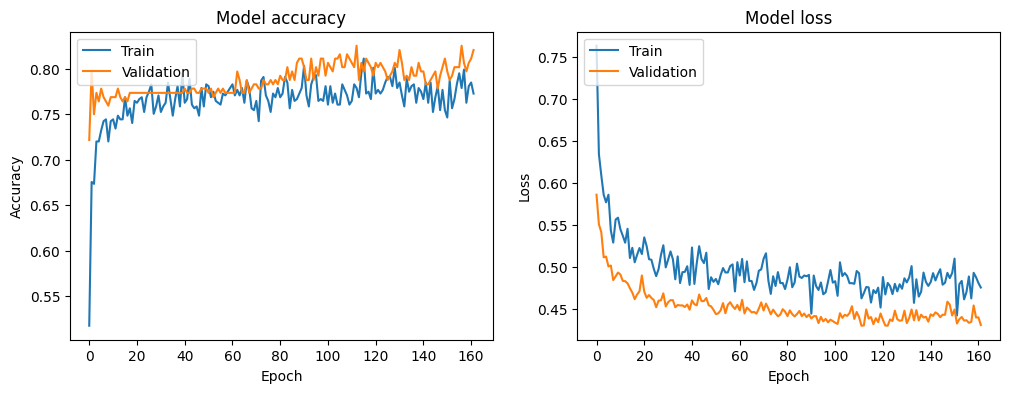

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


# Save model

In [24]:
modelFileName = 'models/titanic.keras'
model.save(modelFileName)